# Introduction to PyCaret
### by Vincent Claes

In [75]:
import numpy as np
import pandas as pd

### Importing function from pyCaret to get datasets

In [76]:
from pycaret.datasets import get_data

In [77]:
data = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                          asia_gdp  Multivariate   
26                         elections  Multivariate   
27                          facebook  Multivariate   
28                               ipl  Multivariate   
29                         jewellery  Multivariate   
30                              mice  Multivariate   
31                         migration  Multivariate   
32                           perfume  Multivariate   
33                           pokemon  Multivariate   
34                        population  Multivariate   
35                     public_health  Multivariate   
36                             seeds  Multivariate   
37                         wholesale  Multivariate   
38                            tweets          Text   
39                            amazon          Text   
40                              kiva          Text   
41                               spx          Text   
42                         wikipedia          Text   
43                        automobile  Multivariate   
44                              bike  Multivariate   
45                            boston  Multivariate   
46                          concrete  Multivariate   
47                           diamond  Multivariate   
48                            energy  Multivariate   
49                            forest  Multivariate   
50                              gold  Multivariate   
51                             house  Multivariate   
52                         insurance  Multivariate   
53                        parkinsons  Multivariate   
54                           traffic  Multivariate   
55                               CTG  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection              None              None   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit              None   
4       Classification (Binary)             Class              None   
5       Classification (Binary)             Class              None   
6       Classification (Binary)           default              None   
7       Classification (Binary)    Class variable              None   
8       Classification (Binary)             stabf              None   
9       Classification (Binary)              left              None   
10      Classification (Binary)             DEATH              None   
11      Classification (Binary)           Disease              None   
12      Classification (Bin

## Classification Example

In [78]:
from pycaret.classification import *

In [79]:
diabetes_data = get_data('diabetes')

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   
4                             168   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            33.6                       0.627   
1                                            26.6                       0.351   
2                                            23.3                       0.672   
3                                            28.1                       0.167   
4                                            43.1                       2.288   

   Age (years)  Class variable  
0           50               1  
1           31               0  
2           32               1  
3           21               0  
4           33               1

In [80]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

## Model Setup

In [ ]:
class_model_diabetes = setup(data=diabetes_data,target='Class variable',numeric_features=['Number of times pregnant'])

## Magic Command to calculate the models for Classification

In [ ]:
compare_models()

In [ ]:
# return best model
#best = compare_models()
# return best model based on AUC
#best = compare_models(sort = 'AUC') #default is 'Accuracy'

In [ ]:
# compare specific models
#best_specific = compare_models(whitelist = ['dt','rf','xgboost'])
# blacklist certain models
#best_specific = compare_models(blacklist = ['catboost', 'svm'])
# return top 3 models based on 'Accuracy'
#top3 = compare_models(n_select = 3)

## Create Classification Model [Logistic Regression]

In [ ]:
lr_model_diabetes = create_model('lr')

## Tune Hyperparameters

In [ ]:
tuned_lr_model_diabetes=tune_model(lr_model_diabetes)

### Learning Curve

In [ ]:
plot_model(estimator = tuned_lr_model_diabetes, plot = 'learning')

### AUC Curve

In [ ]:
plot_model(estimator = tuned_lr_model_diabetes, plot = 'auc')

### Confusion Matrix

In [ ]:
plot_model(estimator = tuned_lr_model_diabetes, plot = 'confusion_matrix')

### Decision Boundary Plot

In [ ]:
plot_model(estimator=tuned_lr_model_diabetes, plot = 'boundary')

### Feature Importance

In [ ]:
plot_model(estimator = tuned_lr_model_diabetes, plot = 'feature')

In [17]:
evaluate_model(tuned_lr_model_diabetes)

Parameters
C                      6.739
class_weight            None
dual                   False
fit_intercept           True
intercept_scaling          1
l1_ratio                None
max_iter                 100
multi_class             auto
n_jobs                  None
penalty                   l2
random_state            6265
solver                 lbfgs
tol                   0.0001
verbose                    0
warm_start             False

## Predict with model data

In [18]:
predict_model(tuned_lr_model_diabetes,data=diabetes_data)

Number of times pregnant  \
0                           6   
1                           1   
2                           8   
3                           1   
4                           0   
..                        ...   
763                        10   
764                         2   
765                         5   
766                         1   
767                         1   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                  148                          
1                                                   85                          
2                                                  183                          
3                                                   89                          
4                                                  137                          
..                                                 ...                          
763                                                101                          
764                                                122                          
765                                                121                          
766                                                126                          
767                                                 93                          

     Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                  72                                35   
1                                  66                                29   
2                                  64                                 0   
3                                  66                                23   
4                                  40                                35   
..                                ...                               ...   
763                                76                                48   
764                                70                                27   
765                                72                                23   
766                                60                                 0   
767                                70                                31   

     2-Hour serum insulin (mu U/ml)  \
0                                 0   
1                                 0   
2                                 0   
3                                94   
4                               168   
..                              ...   
763                             180   
764                               0   
765                             112   
766                               0   
767                               0   

     Body mass index (weight in kg/(height in m)^2)  \
0                                              33.6   
1                                              26.6   
2                                              23.3   
3                                              28.1   
4                                              43.1   
..                                              ...   
763                                            32.9   
764                                            36.8   
765                                            26.2   
766                                            30.1   
767                                            30.4   

     Diabetes pedigree function  Age (years)  Class variable Label   Score  
0                         0.627           50               1     1  0.7354  
1                         0.351           31               0     0  0.0569  
2                         0.672           32               1     1  0.8245  
3                         0.167           21               0     0  0.0480  
4                         2.288           33               1     1  0.8908  
..                          ...          ...             ...   ...     ...  
763                       0.171           63               0     

## Predicting 1 new value

In [32]:
dfPredictNew=pd.DataFrame(np.array([1,85,66,29,0,26.6,0.351,31])).T
new_df_with_col_names = pd.DataFrame(data=dfPredictNew.values, columns=diabetes_data.columns[:-1])

In [34]:
predict_model(tuned_lr_model_diabetes,data=new_df_with_col_names)

Number of times pregnant  \
0                       1.0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                               85.0                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                              66.0                              29.0   

   2-Hour serum insulin (mu U/ml)  \
0                             0.0   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            26.6                       0.351   

   Age (years) Label   Score  
0         31.0     0  0.0569

### Model Blending

In [ ]:
xgb_model_diabetes = create_model('xgboost')

In [ ]:
blend = blend_models(estimator_list=[xgb_model_diabetes,tuned_lr_model_diabetes])

# Regression

### Importing PyCaret Regression Model and the Boston Dataset

In [39]:
from pycaret.regression import *

In [40]:
boston_data = get_data('boston')

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [41]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [55]:
reg_model_boston = setup(data=boston_data, target='medv',numeric_features=['chas','rad','tax'])

 
Setup Succesfully Completed.


In [56]:
compare_models()

## Create Catboost Regression Model

In [57]:
catboost_model_boston = create_model('catboost')

### Tune Hyperparameters for Regression Model

In [58]:
catboost_model_boston=tune_model(catboost_model_boston)

### Model Interpretation

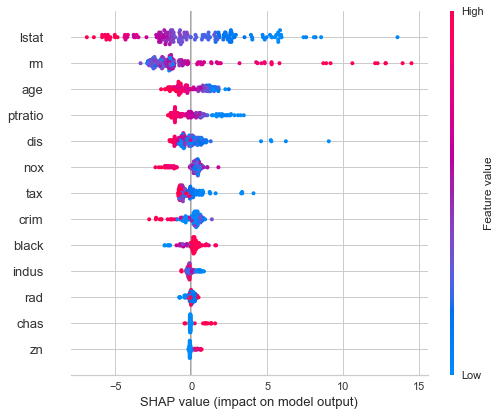

In [59]:
interpret_model(catboost_model_boston)

## Correlation Plot

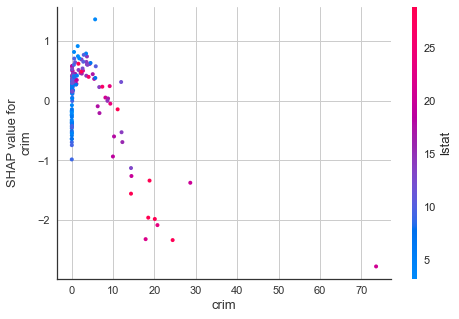

In [60]:
interpret_model(catboost_model_boston,plot='correlation')

### Reason Plot

In [61]:
interpret_model(catboost_model_boston,plot='reason', observation=10)

### Predictions on Boston DataSet

In [67]:
predictions=predict_model(catboost_model_boston,data=boston_data)
predictions.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
index                                                                     
0      0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1      0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2      0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3      0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4      0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   

       ptratio   black  lstat  medv    Label  
index                                         
0         15.3  396.90   4.98  24.0  24.2476  
1         17.8  396.90   9.14  21.6  20.2261  
2         17.8  392.83   4.03  34.7  34.3044  
3         18.7  394.63   2.94  33.4  33.6543  
4         18.7  396.90   5.33  36.2  31.8958

### Prediction on 1 DataPoint

In [69]:
dfPredictNew=pd.DataFrame(np.array([0.02,0.0,7.07,0,0.469,7.185,61.1,4.9,2,242,17.8,392,4.03])).T
new_df_with_col_names = pd.DataFrame(data=dfPredictNew.values, columns=boston_data.columns[:-1])

In [70]:
predict_model(catboost_model_boston,data=new_df_with_col_names)

crim   zn  indus  chas    nox     rm   age  dis  rad    tax  ptratio  \
index                                                                         
0      0.02  0.0   7.07   0.0  0.469  7.185  61.1  4.9  2.0  242.0     17.8   

       black  lstat    Label  
index                         
0      392.0   4.03  33.9418

### Save and Load Model

In [71]:
save_model(catboost_model_boston, model_name='cteq_model')

Transformation Pipeline and Model Succesfully Saved


In [72]:
loaded_bestmodel = load_model('cteq_model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=['chas', 'rad', 'tax'],
                                      target='medv', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Cat...
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='medv')),
                ('fix_perfect', Empty()), ('clean_names', Clean

* Thanks for your attention  
cteq.eu